<a href="https://colab.research.google.com/github/semorrall/colab_uploads/blob/main/stephanie_sandbox/biol300_hw7_individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
# another module for opening images
import gdal

# module for ploting or displaying images
import matplotlib.pyplot as plt

#used for seperating the jellyfish from the ba background
import skimage.filters
import skimage.io
import skimage.morphology
import numpy as np

#for importing multiple images
import glob

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Individual Questions for HW7 (20 points)

For this problem, which will continue into the group component of this homework, we will be examining some images to address the provocative idea of if jellyfish "sleep" or not. It was generally thought that only higher organisms sleep, but [this research paper](https://www.sciencedirect.com/science/article/pii/S0960982217310230) demonstrates that jellyfish do display different behaviors, if not full-on sleep, during the night. Along with the raw data of the images themselves, I have also included a video so you can see what this data look like. As a metric of sleep, we will look at the pulsating of these jellyfish over time.

Let's take a look at one of the images below. For whatever reason, `skimage` was not playing well with these `TIF` files, leading me to use a different package called `gdal` to open the file. While this is a a bit of a nuisance, at the end of the day, the image is just a set of numerical values, so once we are able to wrangle our computer to load in the info, we are good to go. I display this variable `im` below. (Note: I'll always give you the first image loaded in, so you won't have to worry about these issues of which package will or will not work).


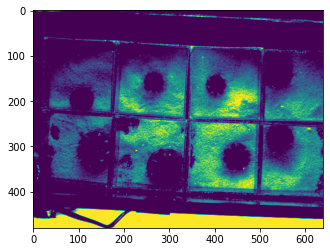

In [4]:
im = gdal.Open("/content/drive/MyDrive/BIOL300_S22/data/jellyfish_day_10sec/Frame_545300.TIF").ReadAsArray()
plt.imshow(im)

In this image, we see there are 8 boxes, each with its own jellyfish. 

A) If you were to try to segment out the jellyfish in this image, would you be looking for low or high pixel intensities? Why?


**If I was segmenting out the jellyfish, I would look for low value pixels because the jellyfish are darker than their background.**

Let's now take a look at a single jellyfish. From some guess-and-check, I was able to isolate the box containing the third jelly fish in this image. As an example of how to slice the image for just the box of interest, I can use the following notation: [`top_edge`:`bottom_edge`, `left_edge`:`right_edge`], where the first two values are specifying the y pixel positions and the last two values are specifying the x pixel positions. Let's take a look at this jellyfish below:


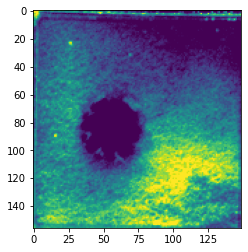

In [6]:
im_box3 = im[80:236,348:497]
plt.imshow(im_box3)

B. To get some practice with slicing out regions of interest (known as ROIs) from the image, update the code below to slice out and display one of the other jellyfish boxes. This may require a bit of guess-and-check, but you can refer to the original image to get a rough sense of the x and y values in the image.

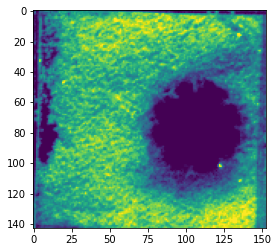

In [15]:
# box 7
im_box7 = im[247:390,342:495]
plt.imshow(im_box7)

C. Moving along with our original jellyfish friend shown in `im_box`, try to segment the image as is using a pixel intensity threshold. Display your thresholded image. Explain why thresholding this image is difficult.

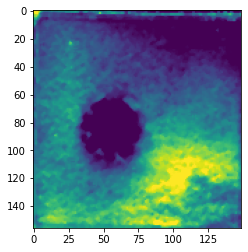

In [18]:
# Make the structuring element
selem = skimage.morphology.square(3)

# Perform the median filter
im_box3_filt = skimage.filters.median(im_box3, selem)

# Display image
plt.imshow(im_box3_filt);

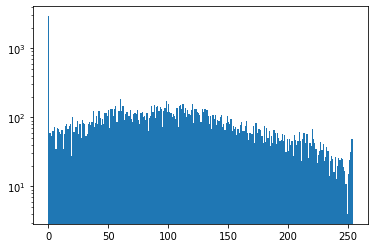

In [22]:
# forcing bins to be discretized by integer value
bins = np.arange(im_box3_filt.min(), im_box3_filt.max(), 1)

# plot histogram
plt.hist(im_box3_filt.flatten(), bins=bins)
plt.yscale("log");

**The threshold is defercult to identify based on the histagram because ther is not a clear vally between the intensity of the jellyfish and the background.**

In [41]:
# Threshold value, as obtained by eye
thresh = 30

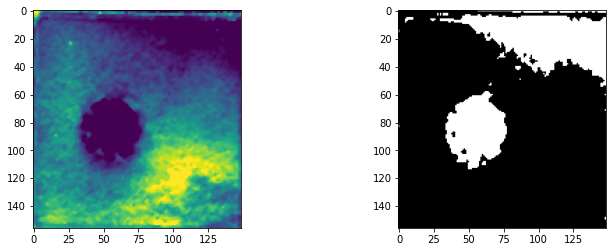

In [42]:
# Generate thresholded image
im_box3_bw = im_box3_filt < thresh

# plot orginal and thresholded next to each other
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].imshow(im_box3_filt)
ax[1].imshow(im_box3_bw, cmap=plt.cm.gray);

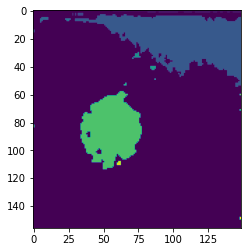

In [43]:
#identifies each seprate region of pixels in the segmented image

labeled = skimage.measure.label(im_box3_filt < thresh)
plt.imshow(labeled);

In [74]:
#number of objects identified in the image based on the given threshold
labeled.max()

18

In [50]:
#regionprops help find more info about the objects in the image
props = skimage.measure.regionprops(labeled)

In [60]:
# a list of the areas of every object identified through segmentation
areas = [prop.area for prop in props]
areas

[142, 2, 2, 8, 2981, 14, 6, 2, 13, 10, 1, 3, 1640, 1, 1, 2, 8, 2]

As you've seen, segmenting this image is difficult, but it turns out for our purposes of watching the jellyfish pulse over time, we actually don't need to perfectly extract where the jellyfish is, but we can instead compare the intensity of the images over time to get a _relative_ sense of the jellyfish area.

D. Below, report the total intensity of the box, by summing up all the pixel values.



In [59]:
#total number of pixels taken up by jellyfish
labeled.sum()

37048

E. At a later time point, when the jellyfish has relaxed and appears larger, what will happen to this total intensity? Will it go up or down? Why?

F. We will be interested in looking at the various images over time. For this, use the `glob.glob` function (see lecture from March 2nd) to grab all the image names in this `jellyfish_day_10sec` folder and save them in a list. Make sure to include the appropriate `import` at the top of the file. Once to have your list of file names, make sure to sort them, and display the first 10 items to make sure it looks correct.


**E) When the jellyfish get bigger the total intensity of the box goes up. The dark and light were inverted in the segmented image, therefore the background pixels now have an intensity of zero (black) and the jellyfish pixels have an intensity of 1 (white).** 

In [68]:
#grabs all complete paths in the jellyfish_day_10sec folder

img_list = glob.glob("/*/*/*/*/data/jellyfish_day_10sec/*")
img_list = np.sort(img_list)
img_list[:10]

array(['/content/drive/MyDrive/BIOL300_S22/data/jellyfish_day_10sec/Frame_545300.TIF',
       '/content/drive/MyDrive/BIOL300_S22/data/jellyfish_day_10sec/Frame_545301.TIF',
       '/content/drive/MyDrive/BIOL300_S22/data/jellyfish_day_10sec/Frame_545302.TIF',
       '/content/drive/MyDrive/BIOL300_S22/data/jellyfish_day_10sec/Frame_545303.TIF',
       '/content/drive/MyDrive/BIOL300_S22/data/jellyfish_day_10sec/Frame_545304.TIF',
       '/content/drive/MyDrive/BIOL300_S22/data/jellyfish_day_10sec/Frame_545305.TIF',
       '/content/drive/MyDrive/BIOL300_S22/data/jellyfish_day_10sec/Frame_545306.TIF',
       '/content/drive/MyDrive/BIOL300_S22/data/jellyfish_day_10sec/Frame_545307.TIF',
       '/content/drive/MyDrive/BIOL300_S22/data/jellyfish_day_10sec/Frame_545308.TIF',
       '/content/drive/MyDrive/BIOL300_S22/data/jellyfish_day_10sec/Frame_545309.TIF'],
      dtype='<U76')

In [73]:
# just the local document names from the jellyfish_day_10sec folder
doc_names = []

for i in img_list:
  i = i.split("/")[-1]
  doc_names.append(i)
  
doc_names[:10]

['Frame_545300.TIF',
 'Frame_545301.TIF',
 'Frame_545302.TIF',
 'Frame_545303.TIF',
 'Frame_545304.TIF',
 'Frame_545305.TIF',
 'Frame_545306.TIF',
 'Frame_545307.TIF',
 'Frame_545308.TIF',
 'Frame_545309.TIF']